#                                      Diabetes_Patients_Project
   

# 1. Import the required libraries:

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import math
#splitting data into train and test
from sklearn.model_selection import train_test_split
#for feature scaling:
from sklearn.preprocessing import StandardScaler
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#support vector machine
from sklearn.svm import SVC
#Evaluation
from sklearn.model_selection import cross_val_score
#for ignoring warnings:
import warnings
warnings.filterwarnings('ignore')


# 2. Import the csv files:

In [67]:
data = pd.read_csv(r"C:\Users\ANJU VERMA\Downloads\Diabetes patients CSV FILE.csv")

In [65]:
#copy the dataset

In [66]:
df = data.copy()

### 3. Explore the dataset:

In [37]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### heatmap to check missing values in dataset

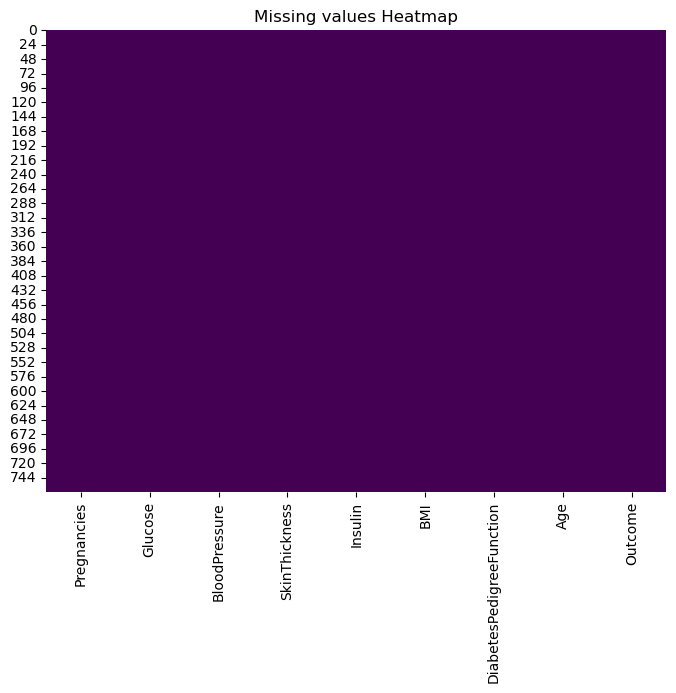

In [68]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cmap='viridis',cbar=False)
plt.title('Missing values Heatmap')
plt.show()

### 4. Analysis and feature Engineering:

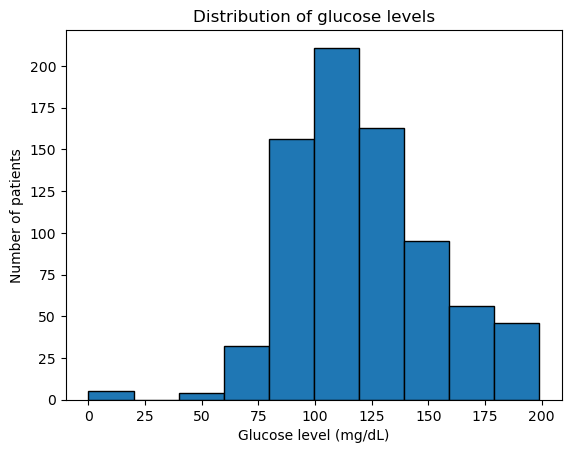

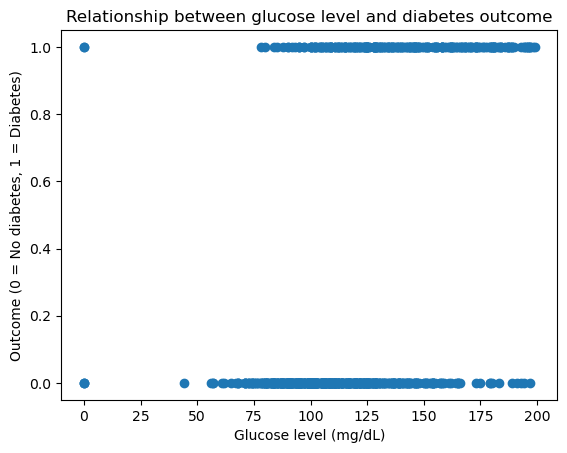

In [42]:
# Analyze the distribution of glucose levels
plt.hist(df['Glucose'], bins=10, edgecolor='black')
plt.xlabel('Glucose level (mg/dL)')
plt.ylabel('Number of patients')
plt.title('Distribution of glucose levels')
plt.show()

# Analyze relationships between variables
plt.scatter(df['Glucose'], df['Outcome'])
plt.xlabel('Glucose level (mg/dL)')
plt.ylabel('Outcome (0 = No diabetes, 1 = Diabetes)')
plt.title('Relationship between glucose level and diabetes outcome')
plt.show()

### 5. Visualizing the Dataset for Better Understanding:

In [69]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

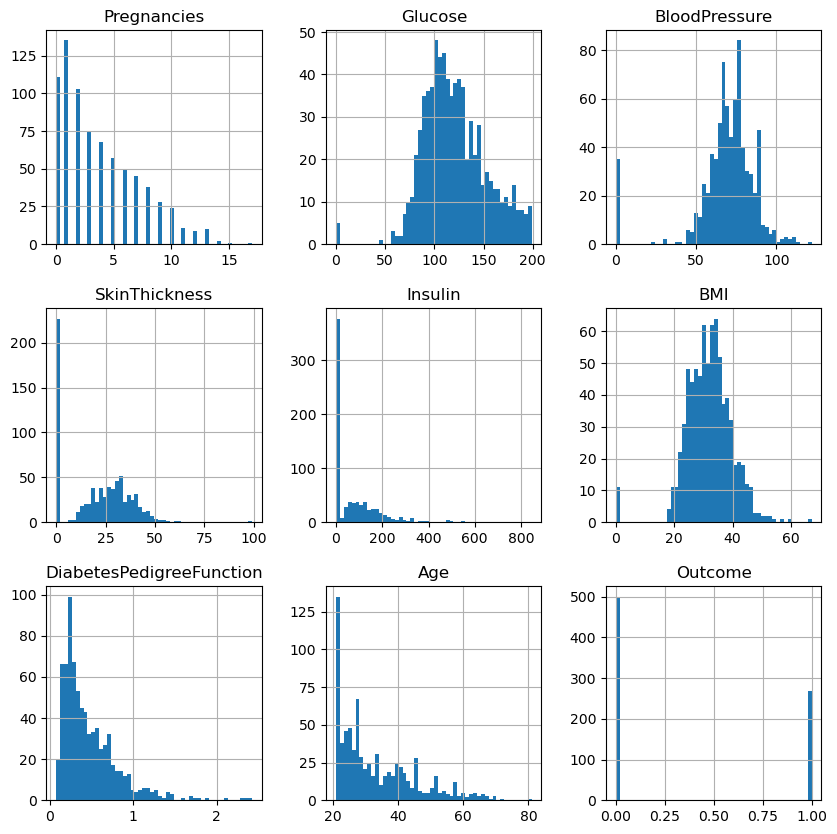

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the histogram
fig, ax = plt.subplots(figsize=(10, 10))
df.hist(bins=50, ax=ax)

# Show the plot
plt.show()

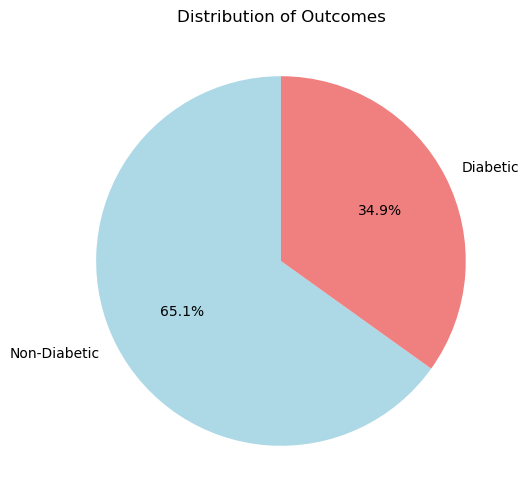

In [71]:
# Count the occurrences of each outcome value
outcome_counts = df['Outcome'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Outcomes')
plt.show()

### 6: Feature Scaling

In [44]:
scaler = StandardScaleaaaaaq12w2wsedrrthhhhhhhwhhhggwjjkiewq[]]ooo5aaaaaaa1QQ1DWr()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 7: Feature Selection using Random Forest Feature Importance

In [45]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_
indices = feature_importances.argsort()[::-1]
k = 5
selected_features = indices[:k]

### 8: Model Optimization using Grid Search for Support Vector Machine

In [46]:
svm = SVC()
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train[:, selected_features], y_train)
best_svm = grid_search.best_estimator_

### 9: Model Comparison (Logistic Regression, Decision Trees, SVM)

In [47]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Trees': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': best_svm
}

for model_name, model in models.items():
    model.fit(X_train[:, selected_features], y_train)
    y_pred = model.predict(X_test[:, selected_features])
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 72.40%
Decision Trees Accuracy: 65.62%
Support Vector Machine Accuracy: 74.48%


### 10: Error Analysis - Confusion Matrix

In [48]:
for model_name, model in models.items():
    y_pred = model.predict(X_test[:, selected_features])
    cm = confusion_matrix(y_test, y_pred)
    print(f"{model_name} Confusion Matrix:")
    print(cm)

Logistic Regression Confusion Matrix:
[[98 25]
 [28 41]]
Decision Trees Confusion Matrix:
[[83 40]
 [26 43]]
Support Vector Machine Confusion Matrix:
[[101  22]
 [ 27  42]]


### Visualization of Model Results - Confusion Matrix

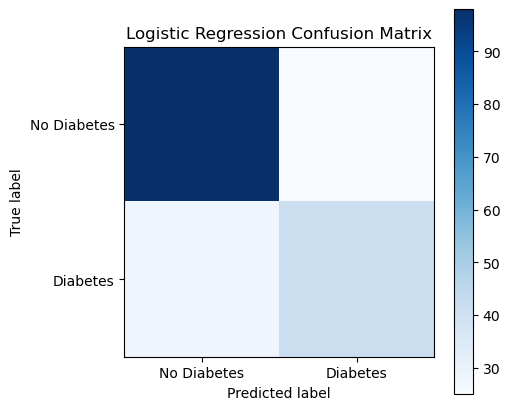

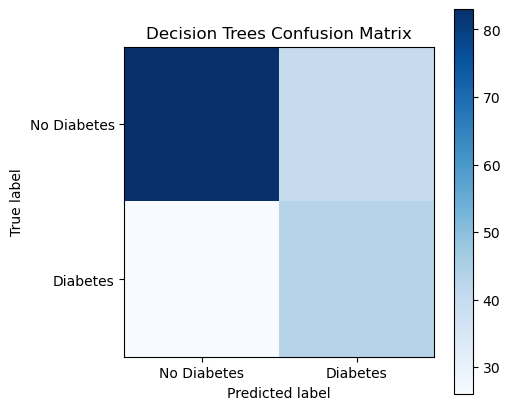

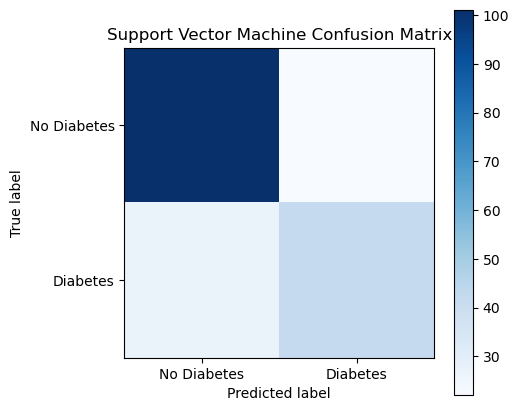

In [72]:
for model_name, model in models.items():
    y_pred = model.predict(X_test[:, selected_features])
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.colorbar()

    classes = ['No Diabetes', 'Diabetes']
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()